# 필요모듈 설치 및 데이터 불러오기

```
https://github.com/songys/Chatbot_data
다음카페 "사랑보다 아름다운 실연( http://cafe116.daum.net/_c21_/home?grpid=1bld )"에서 나온 이야기들을 참고하여 제작됨.
이별과 관련된 내용은 1, 사랑과 관련된 내용은 2로 라벨링되어있음
```

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 

from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/텍스트데이터분석/중간대체과제/Chatbot_data-master/ChatbotData.csv")
data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


# 1.konlpy를 통한 형태소 분석 및 워드클라우드

In [ ]:
# 이별에 대한 고민은 1로, 사랑에 대한 고민은 2로 라벨링되어있음
# 둘을 분리하여 각각 한 문자열로 만들어줌
farewell = data[data["label"] == 1]["Q"]
love = data[data["label"] == 2]["Q"]

In [ ]:
farewell_text = []
for word in farewell:
  farewell_text.append(word)

love_text = []
for word in love:
  love_text.append(word)

In [ ]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(text):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in text.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사

    filtered_count = {"N_POS" : 0, "V_POS" : 0, "X_POS" : 0, "M_POS" : 0}
    
    for part in parts:
        if part[1] in N_POS:
            filtered_count["N_POS"] += 1
        elif part[1] in V_POS:
            filtered_count["V_POS"] += 1 
        elif part[1] in X_POS:
            filtered_count["X_POS"] += 1 
        elif part[1] in M_POS:
            filtered_count["M_POS"] += 1 
        else:
            continue                
    return filtered_count


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main(sentences):    
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)        
    return parts, filtered

#### 이별관련 고민 vs 사랑관련 고민 명사 텍스트 비교

In [ ]:
farewell_parts, farewell_filtered = main(farewell_text)
love_parts, love_filtered = main(love_text)

farewll_nouns = [tup[0] for tup in farewell_parts if tup[1][0] == "N"]
love_nouns = [tup[0] for tup in love_parts if tup[1][0] == "N"]

In [ ]:
farewell_dict = dict()
for word in farewll_nouns:
  if word in farewell_dict.keys():
    farewell_dict[word] += 1
  else:
    farewell_dict[word] = 0

love_dict = dict()
for word in love_nouns:
  if word in love_dict.keys():
    love_dict[word] += 1
  else:
    love_dict[word] = 0

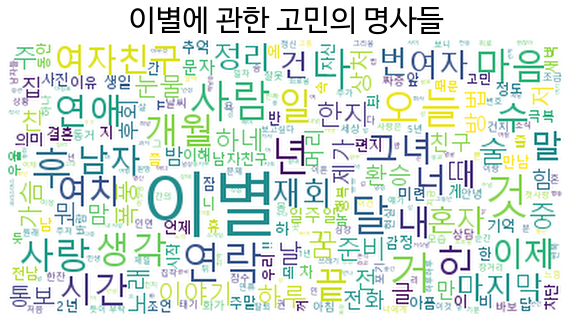

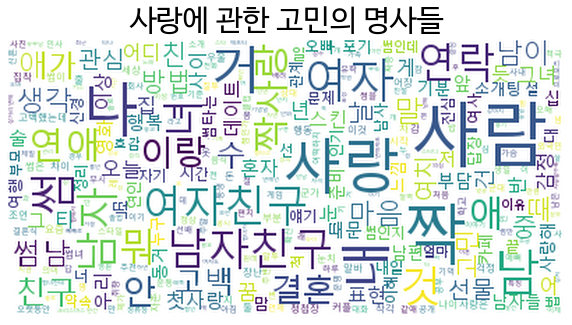

In [ ]:
stopwords = set(STOPWORDS)    
stopwords.update([""])   

#img_mask = np.array(Image.open("star.jpg")) 
#image_colors = ImageColorGenerator(img_mask)
 
FONTPATH =  "malgun.ttf"   

wordcloud = WordCloud(max_font_size = 50, max_words = 1000,
                      stopwords=stopwords,background_color='white',
                      random_state=10,
                      font_path = FONTPATH)
farewell_wc = wordcloud.generate_from_frequencies(farewell_dict)

plt.figure(figsize = (10, 10))
plt.imshow(farewell_wc, interpolation = "lanczos")
plt.title("이별에 관한 고민의 명사들", fontsize = 30)
plt.axis("off")


love_wc = wordcloud.generate_from_frequencies(love_dict)
plt.figure(figsize = (10, 10))
plt.imshow(love_wc, interpolation = "lanczos")
plt.title("사랑에 관한 고민의 명사들", fontsize = 30)
plt.axis("off")
plt.show()

In [ ]:
print("사랑에 관한 텍스트 빈도 기준 상위 20개")
print(sorted([(i, j) for j, i in love_dict.items()], reverse = True)[:20])
print("\n")
print(sorted([(i, j) for j, i in farewell_dict.items()], reverse = True)[:20])
print("사랑에 관한 텍스트 빈도 기준 상위 20개")

사랑에 관한 텍스트 빈도 기준 상위 20개
[(382, '사람'), (333, '짝'), (268, '사랑'), (258, '나'), (200, '내'), (198, '거'), (185, '남'), (179, '썸'), (173, '여자'), (151, '남자'), (146, '여자친구'), (145, '남자친구'), (136, '연락'), (135, '것'), (134, '녀'), (112, '뭐'), (107, '연애'), (106, '짝사랑'), (105, '애'), (90, '안')]


[(428, '이별'), (136, '것'), (119, '거'), (111, '달'), (109, '후'), (109, '년'), (107, '연락'), (105, '사람'), (104, '오늘'), (103, '나'), (78, '일'), (78, '생각'), (75, '사랑'), (73, '마음'), (68, '내'), (67, '그녀'), (65, '개월'), (63, '끝'), (62, '연애'), (60, '시간')]
사랑에 관한 텍스트 빈도 기준 상위 20개


 1. 사랑의 경우 "사람", "짝", "사랑", ... "남자", "여자"같은 단어들이 눈에 띄는데, 남성과 여성이 만나는 과정에서 일어나는 일들을 표현할 수 있는 단어들로 보인다.

 2. 이별의 경우  "이별",... "연락", "사람", "오늘", "나"와 같이 남성과 여성이 헤어지는 과정에서 일어나는 일들을 표현하는 단어로 보인다. 특히 사랑의 고민인 경우 상대방을 생각하며 나오는 "사람", "짝", "남자", "여자"와 같은 텍스트가 비중을 차지한 반면, 이별의 경우에서 "나"라는 단어로 남녀가 헤어지는 과정에서 자신의 입장을 생각하는 경우가 높음을 알 수 있다

 3. 각 분류클래스의 빈도 기준 상위 10개 단어들을 살펴본 결과, 어느 정도 차이가 있다고 보여지며 빈도를 기반으로 하는 tf-idf방식의 키워드 추출 결과가 기대된다.




#### 이별관련 고민 vs 사랑관련 고민 각 형태소별 비율 비교

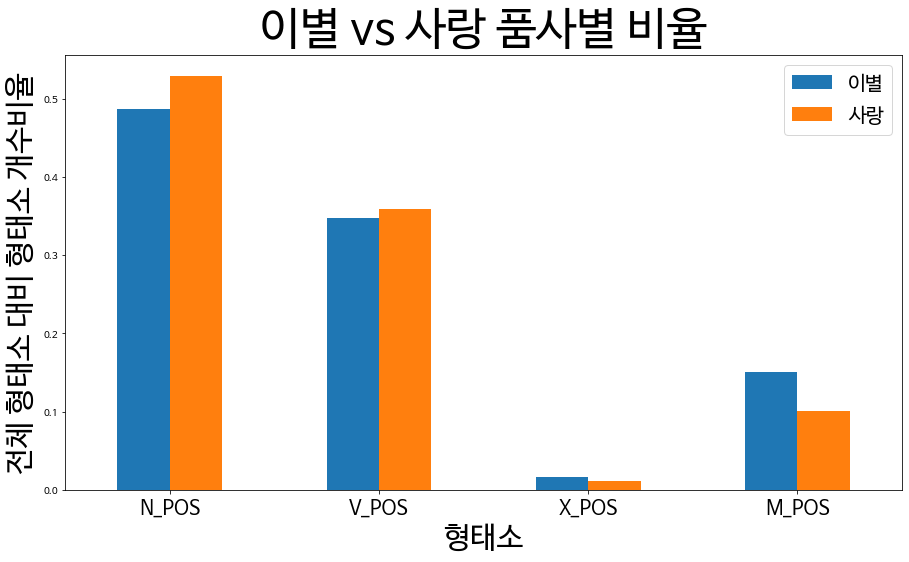

In [ ]:
data = pd.DataFrame(farewell_filtered, index = ["이별"])
data.loc["사랑"] = love_filtered.values()
data = data.T

for col in data.columns:
  data[col] = data[col]/ data[col].sum()

figure, ax = plt.subplots(1, 1, figsize = (15, 8))
data.plot.bar(ax = ax, style = "ggplot")
plt.title("이별 vs 사랑 품사별 비율", fontsize = 45)
plt.xlabel("형태소", fontsize = 30)
plt.ylabel("전체 형태소 대비 형태소 개수비율", fontsize = 30)
plt.xticks(rotation = 0, fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

#### 각 클래스 내에서 각 형태소가 차지하는 비중은 큰 차이가 있다고 보기 어렵다. 고민을 털어놓는 구어체 형식이기 때문에 어느 정도의 스토리텔링 방식이 비슷하다고 보여진다.

# 2. TF-IDF 가중치를 사용한 통계기반 단어 표현

In [ ]:
farewell_token = ""
for tup in farewell_parts:
  if tup[0].isalpha():
      farewell_token += tup[0]
      farewell_token += " "

love_token = ""
for tup in love_parts:
  if tup[0].isalpha():
      love_token += tup[0]
      love_token += " "

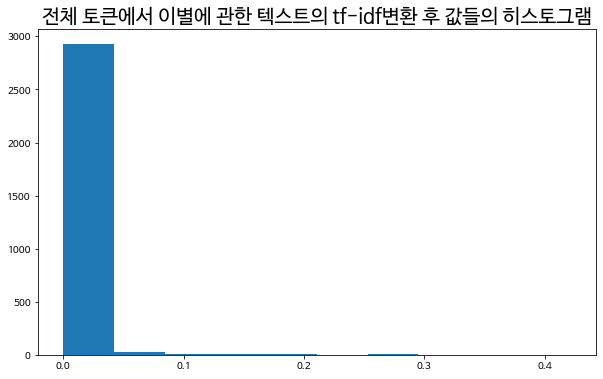

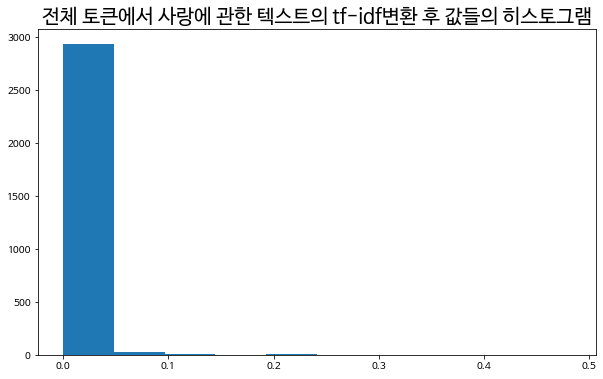

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

DOCUMENT_SET = [
    farewell_token, love_token
]

vectorizer = TfidfVectorizer(tokenizer=str.split, norm = "l2")             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(DOCUMENT_SET)
doc_term_mat_d = doc_term_mat.toarray()

plt.figure(figsize = (10, 6))
plt.hist(doc_term_mat_d[0])
plt.title("전체 토큰에서 이별에 관한 텍스트의 tf-idf변환 후 값들의 히스토그램", fontsize = 20)

plt.figure(figsize = (10, 6))
plt.hist(doc_term_mat_d[1])
plt.title("전체 토큰에서 사랑에 관한 텍스트의 tf-idf변환 후 값들의 히스토그램", fontsize = 20)
plt.show()

### 위처럼 전체 토큰에서는 tf-idf 값이 0인 값이 많은 비율을 차지하는 것으로 보아, 일상적으로 말하는 단어 중 겹치는 단어가 많은 것으로 추정된다.

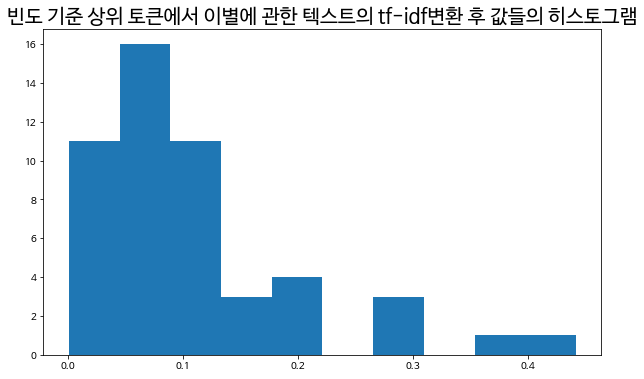

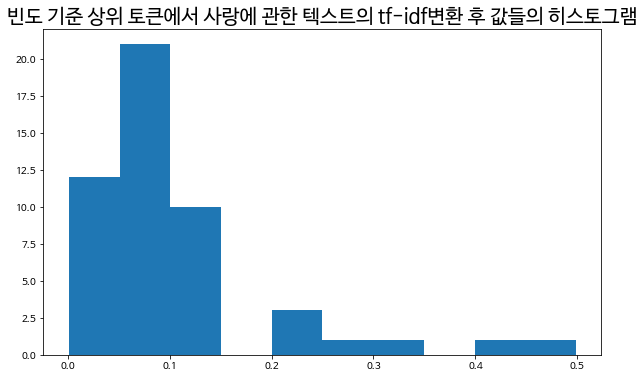

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=str.split, norm = "l2", max_features = 50)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(DOCUMENT_SET)
doc_term_mat_d = doc_term_mat.toarray()

plt.figure(figsize = (10, 6))
plt.hist(doc_term_mat_d[0])
plt.title("빈도 기준 상위 토큰에서 이별에 관한 텍스트의 tf-idf변환 후 값들의 히스토그램", fontsize = 20)

plt.figure(figsize = (10, 6))
plt.hist(doc_term_mat_d[1])
plt.title("빈도 기준 상위 토큰에서 사랑에 관한 텍스트의 tf-idf변환 후 값들의 히스토그램", fontsize = 20)
plt.show()

### 고빈도 단어들에 대해 tf-idf값들을 적용한 결과 두 문서 간의 차이가 어느 정도 있는 것으로 확인된다.

### 하지만 전체 단어에 대해서 벡터로 표현해야함으로 tf-idf기법이 최선이라고 결론지을 수 없다.